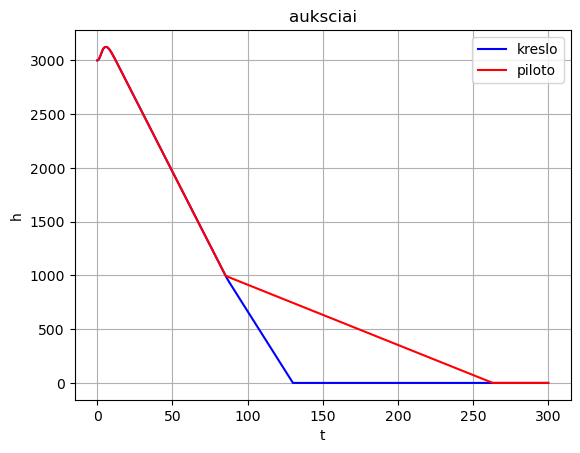

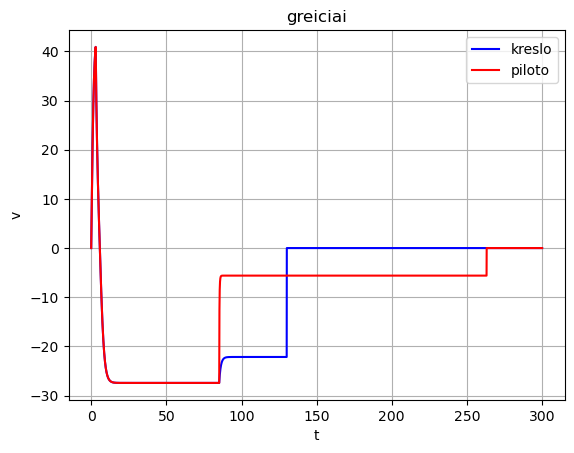

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def funk(X,t):  # PDL desines puses funkcija
  hk=X[0];hp=X[1];vk=X[2];vp=X[3]; # kreslo ir piloto auksciai ir greiciai
  mp=80;mk=150;kk=3;kp=25          # mases ir oro pasipriesinimo koeficientai
  F=8000;    # katapultos jega
  if t > 3: F=0            
  
  rez=np.zeros(4,dtype=float)

  if hk > 1000:   # iki parasiuto issiskleidimo
    rez[0]=vk;rez[1]=vp;
    rez[2]=-9.81+(F-kk*vk**2*np.sign(vk))/(mp+mk);
    rez[3]=rez[2];
  else:           # issikleidus parasiutui
    rez[0]=vk;rez[2]=-9.81-kk*vk**2*np.sign(vk)/mk
    rez[1]=vp; rez[3]=-9.81-kp*vp**2*np.sign(vp)/mp;
    
  return rez

ttt=300  # skaiciavimo laikas  (s)
t=np.linspace(0,ttt,10000);dt=t[1]-t[0]; #laiko momentai
h0=3000  # pradinis aukstis (m)
N=len(t); rez=np.zeros([4,N],dtype=float) # rezultatu masyvas
rez[:,0]=np.array([h0,h0,0,0]);           # pradines salygos

if 0:   # sprendimas Eulerio metodu
  for i in range (N-1):  
   rez[:,i+1]=rez[:,i]+funk(rez[:,i],t[i])*dt
else: 
  for i in range (N-1) :  # sprendimas IV RK metodu
    fz=rez[:,i]+funk(rez[:,i],t[i])*dt/2
    fzz=rez[:,i]+funk(fz,t[i]+dt/2)*dt/2
    fzzz=rez[:,i]+funk(fzz,t[i]+dt/2)*dt
    rez[:,i+1]=rez[:,i]+dt/6*(funk(rez[:,i],t[i])+2*funk(fz,t[i]+dt/2)+2*funk(fzz,t[i]+dt/2)+funk(fzzz,t[i]+dt))
    # jeigu pasiekta zeme, greiciams priverstinai priskiriami nuliai. Funkcijoje fnk butu galima priskirti nulius tik greiciu isvestinems,
    # Tai reikstu kad jie nebekinta, taciau reiksmes isliktu tokios pacios, kaip ir smugio i zeme metu  
    if rez[0,i+1] <= 0 : rez[[0,2],i+1]=0  
    if rez[1,i+1] <= 0 : rez[[1,3],i+1]=0


# rezultatu pavaizdavimas: 
fig1=plt.figure(1); ax1=fig1.add_subplot(1,1,1); ax1.set_xlabel('t');ax1.set_ylabel('h');ax1.grid();plt.title('auksciai')
ax1.plot(t,rez[0,:],'b-');ax1.plot(t,rez[1,:],'r-'); plt.legend(['kreslo','piloto']);plt.show()

fig2=plt.figure(1); ax2=fig2.add_subplot(1,1,1); ax2.set_xlabel('t');ax2.set_ylabel('v');ax2.grid();plt.title('greiciai')
ax2.plot(t,rez[2,:],'b-');ax2.plot(t,rez[3,:],'r-');plt.legend(['kreslo','piloto']);plt.show();